In [3]:
import antigranular as ag
ag.login(<client_id>,<client_secret>, competition = "Eyes-Off Data Competition ")

Connected to Antigranular server session id: a806af8d-9ca4-496a-933d-d8804cd52c9a
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server


In [41]:
session.session_id

'2115ceb3-d6f0-4ab3-9281-d6282a75c2b7'

In [42]:
%%ag
from ag_utils import load_dataset

data = load_dataset('Cancer Dataset')

In [43]:
%%ag
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']

In [44]:
%%ag
correlation_matrix = train_x.corr(eps=1, numeric_only=True)
from ag_utils import export
export(correlation_matrix, "correlation_matrix")

Setting up exported variable in local environment: correlation_matrix


<Axes: >

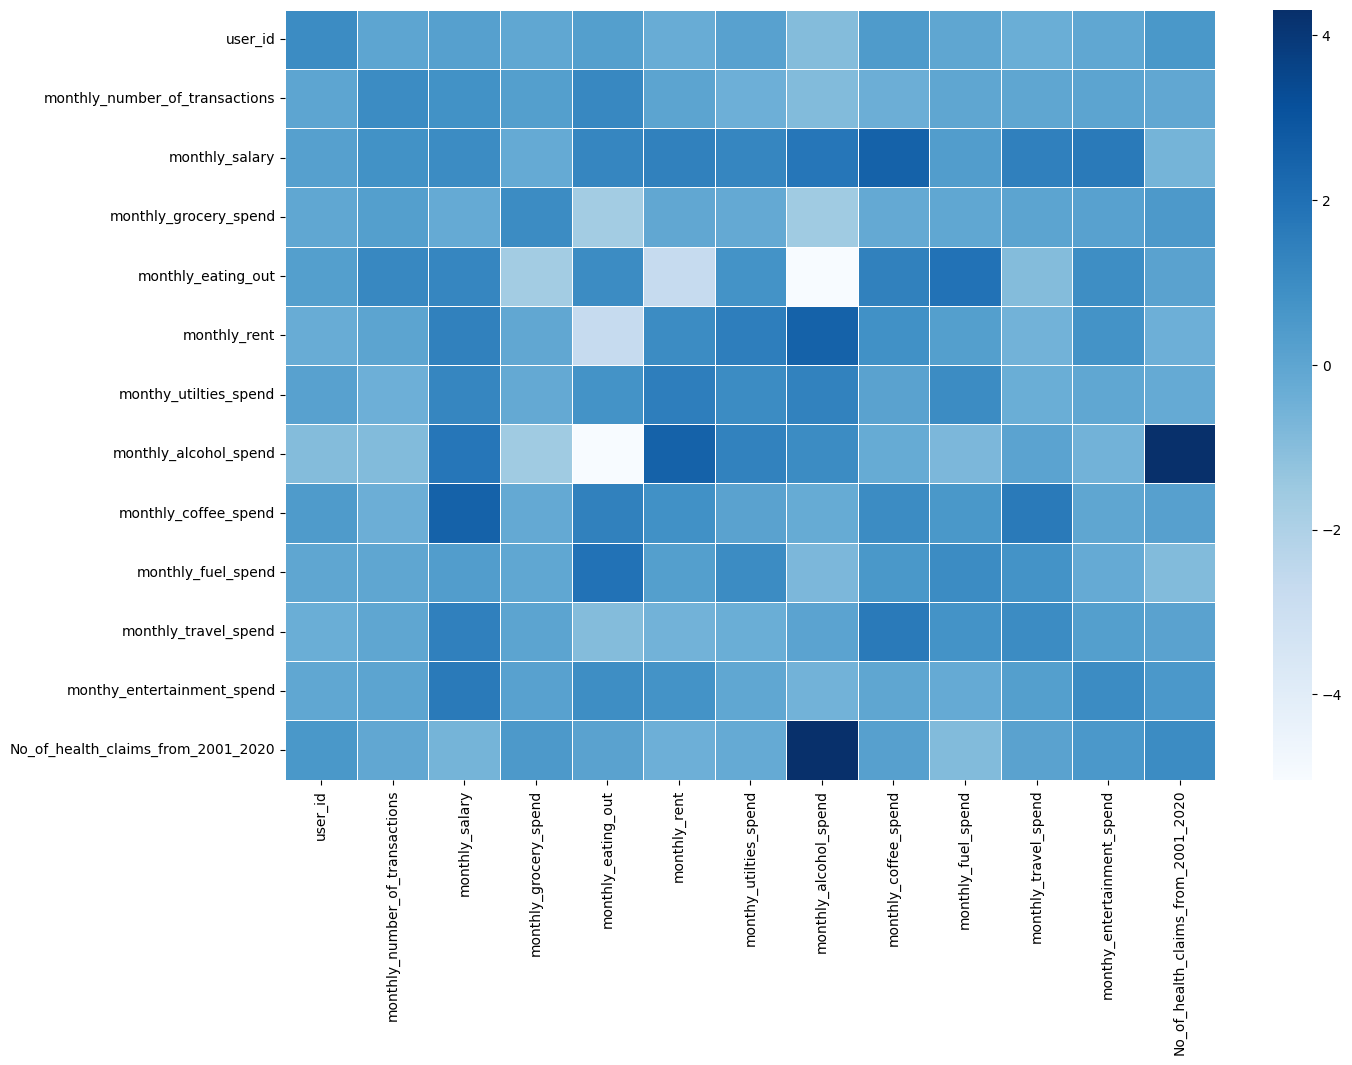

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 10))
correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.heatmap(correlation_matrix, cmap='Blues', linewidths=0.5, fmt='.2f')

<Axes: xlabel='monthly_salary', ylabel='monthly_rent'>

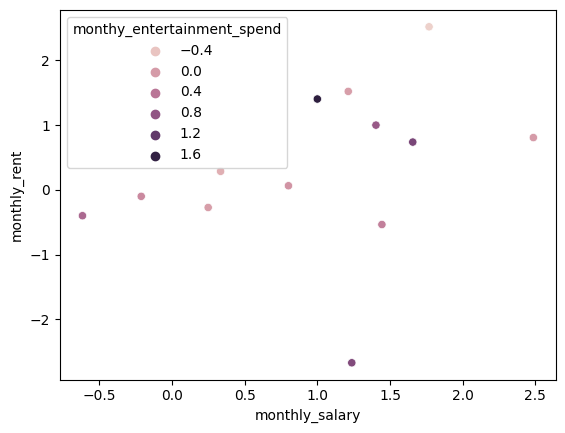

In [46]:
sns.scatterplot(x='monthly_salary', y='monthly_rent',hue='monthy_entertainment_spend', data=correlation_matrix)

In [53]:
%%ag
from op_diffprivlib import models
from op_pandas import PrivateDataFrame
from op_snsynth.transform import LabelTransformer
from pandas import DataFrame
label_transformer = LabelTransformer()
label_transformer.fit(train_x['user_gender'])
dp_transformed_labels = label_transformer.transform(train_x['user_gender'])
# test_x = PrivateDataFrame(DataFrame({'user_gender': dp_transformed_labels}))
train_x = PrivateDataFrame(DataFrame({'user_gender': dp_transformed_labels}))
# label_transformer.fit(train_x['gym_membership'])
# dp_transformed_labels = label_transformer.transform(train_x['gym_membership'])
# train_x = PrivateDataFrame(DataFrame({'gym_membership': dp_transformed_labels}))
gender = test_x[['user_gender']]
# export(gender, 'describe')
rf = models.GaussianNB(bounds=(0,1))
rf.fit(train_x, train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [57]:
%%ag
y_pred = rf.predict(test_x)

In [60]:
%%ag
from ag_utils import submit_predictions
import pandas as pd
submit_predictions(pd.DataFrame(y_pred))

error: Last submission done under 5 minutes ago

